In [24]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from PIL import Image
import random
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input
from keras.utils import load_img, img_to_array
from IPython import display

In [43]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

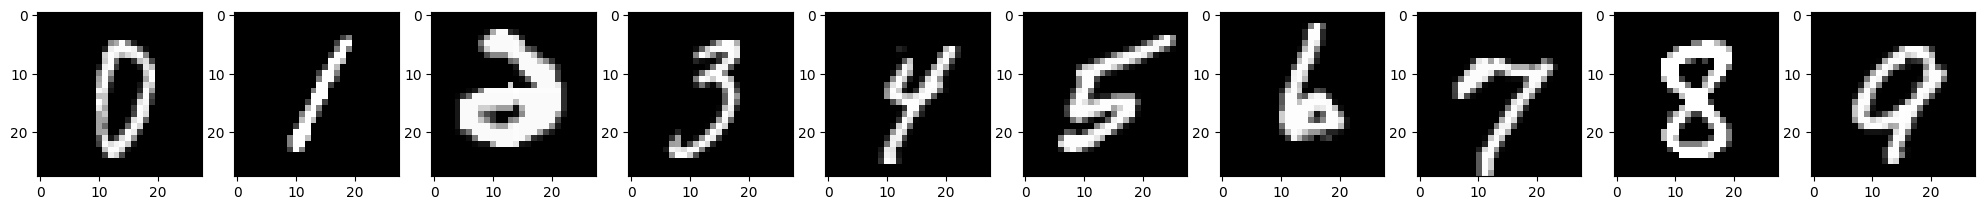

In [44]:
fig, axs = plt.subplots(1, 10, figsize=(25,3)) # создаем полотно для 10 графиков с размером 25 на 3
for i in range(10):
  label_indexes = np.where(y_train == i)[0] # получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # выбирает случайный индекс из списка созданного выше
  img = x_train[index] # выбираем из x_train нужное положение
  axs[i].imshow(Image.fromarray(img), cmap='gray') # выводим изображение

plt.show()

## Нормализация вектора

In [12]:
x_train = x_train.astype(np.float32)
x_train /= 255.0
x_test = x_test.astype(np.float32)
x_test /= 255.0

In [13]:
model = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(800, activation="relu"),
    Dense(10, activation="softmax")
])

In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])

In [15]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 800)            │       628,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 636,010 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

None


### Обучение сети

In [16]:
model.fit(x_train, y_train, batch_size = 200, epochs = 30, verbose = 1)

Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5430 - loss: 1.7300
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8497 - loss: 0.7045
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8770 - loss: 0.5132
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8869 - loss: 0.4417
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8944 - loss: 0.3997
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9003 - loss: 0.3737
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9056 - loss: 0.3503
Epoch 8/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9072 - loss: 0.3363
Epoch 9/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9096 - loss: 0.3292
Epoch 10/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9150 - loss: 0.3083
Epoch 11/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9138 - loss: 0.3046
Epoch 12/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s

## Проверка

In [19]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
print(f"Точность на обучающих данных: {train_accuracy:.4f}")
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Точность на тестовых данных: {test_accuracy:.4f}")

Точность на обучающих данных: 0.9435
Точность на тестовых данных: 0.9421


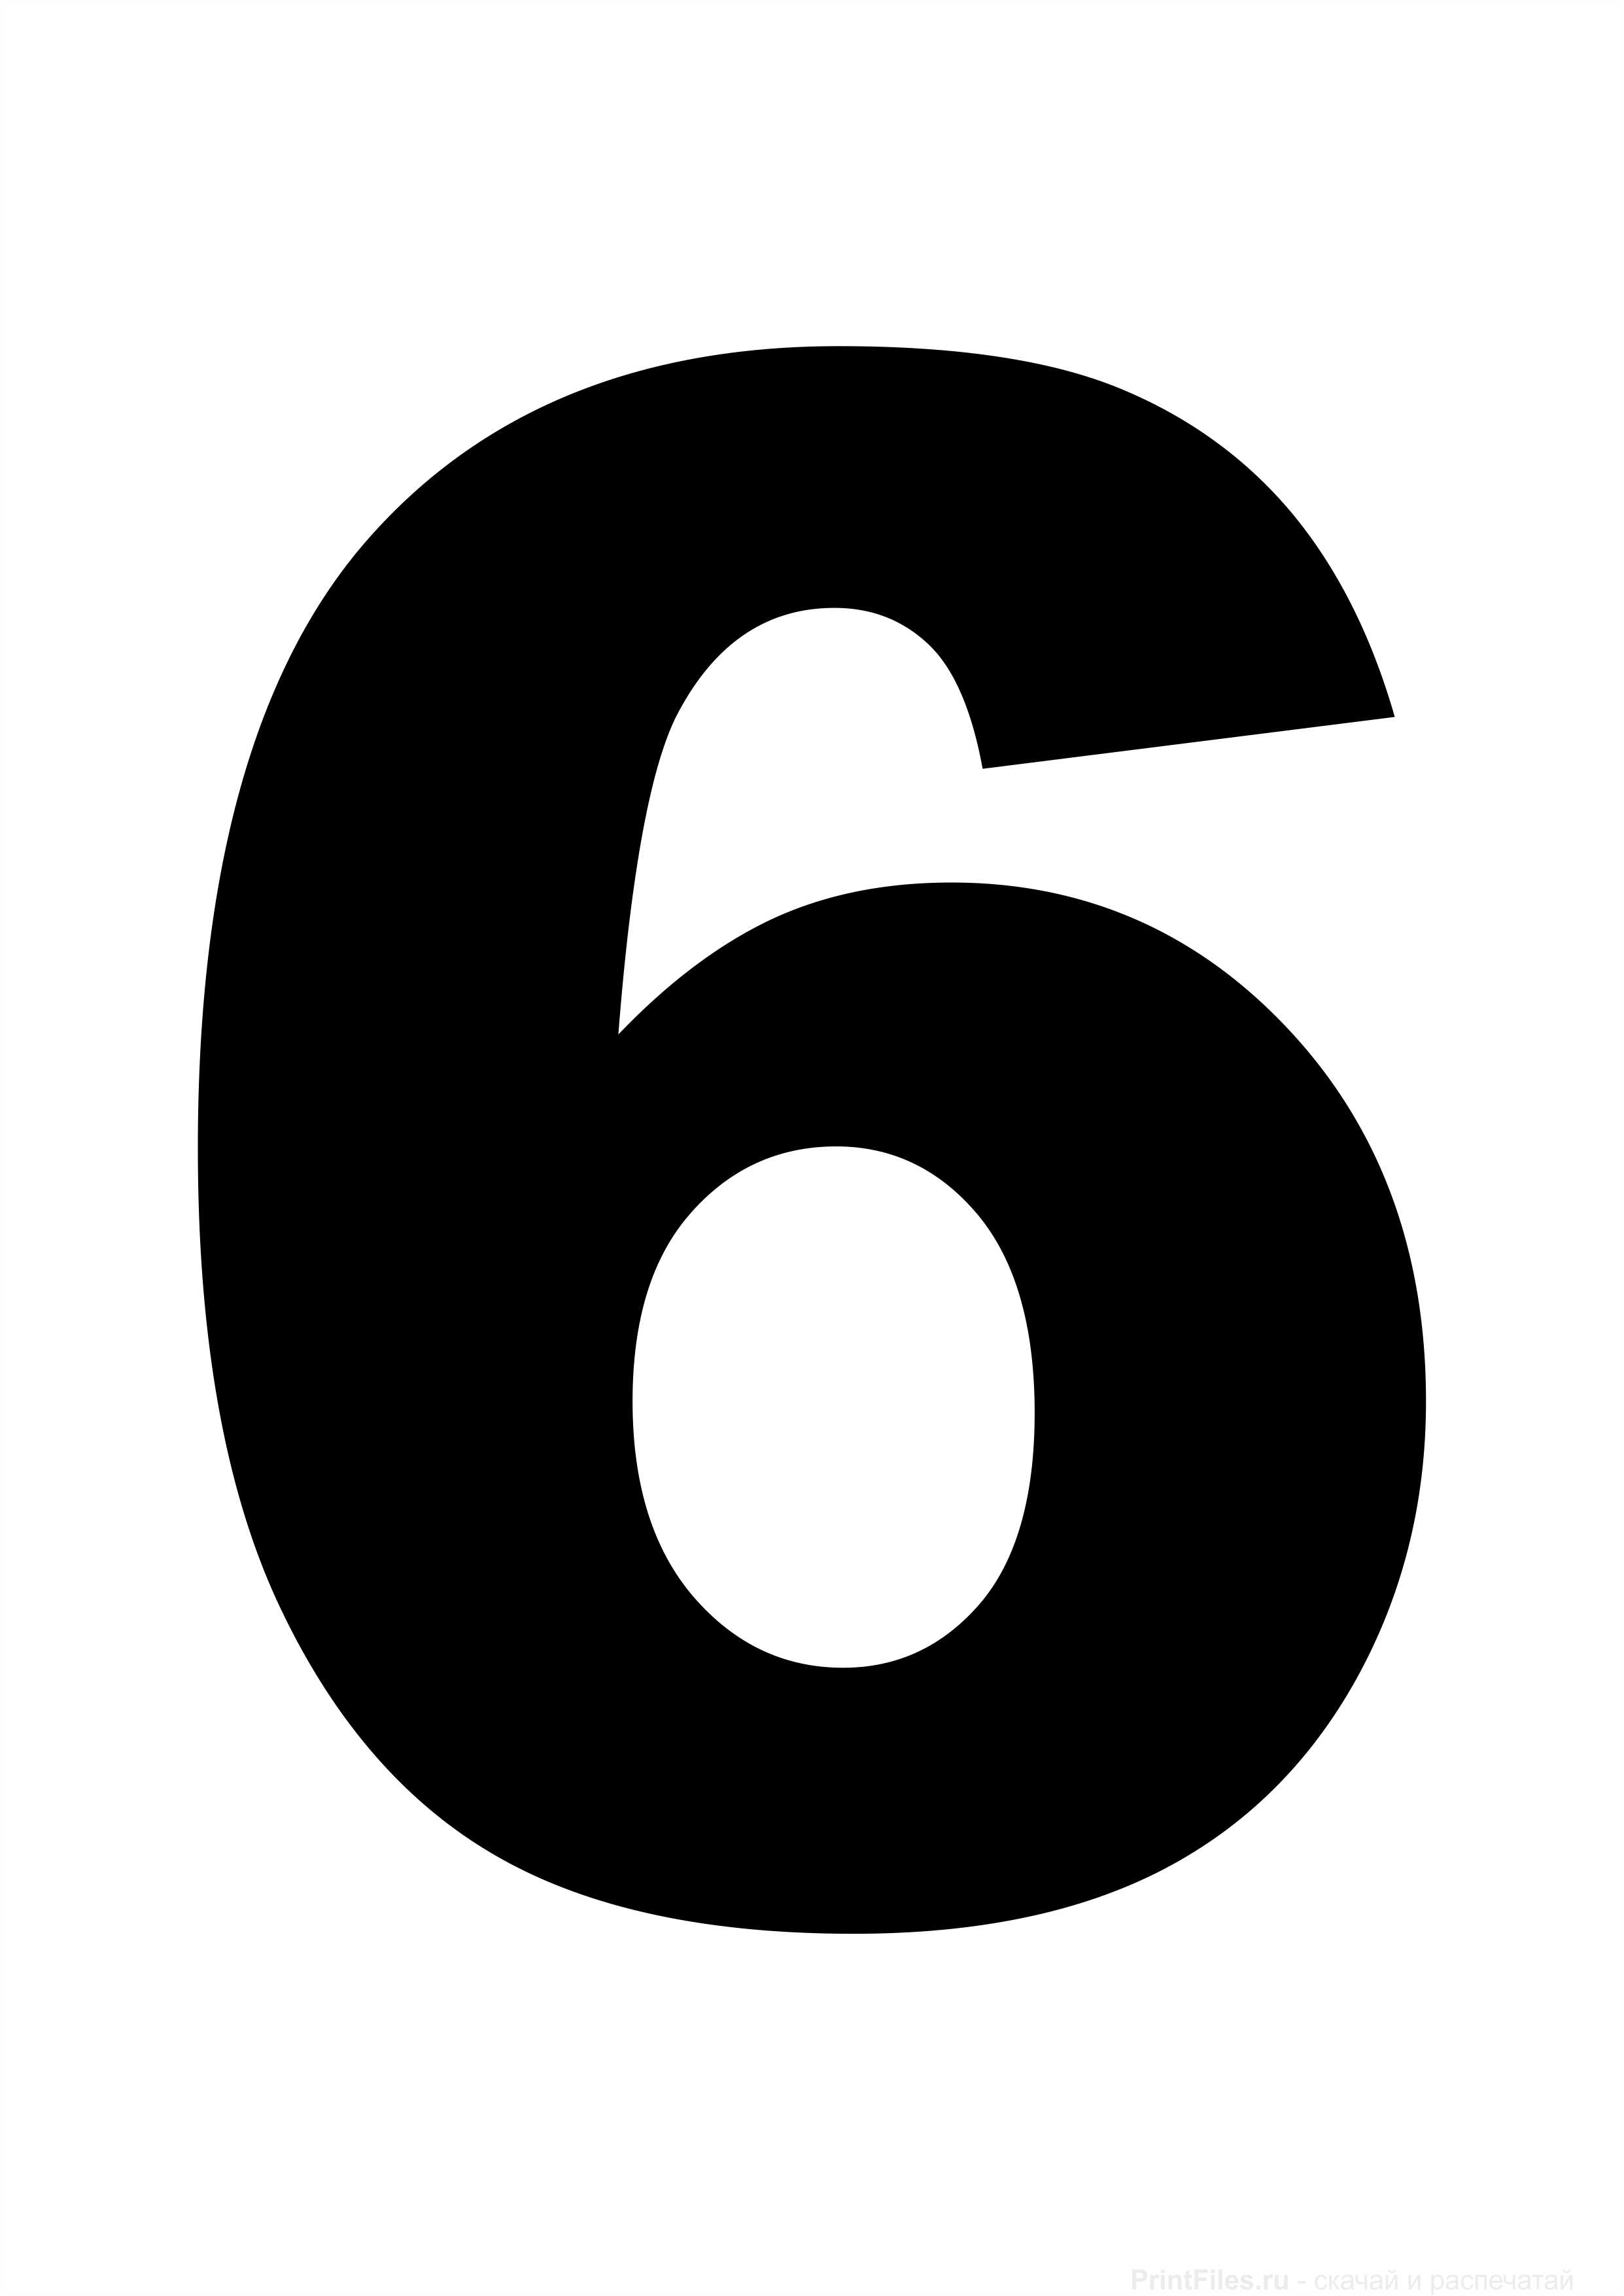

In [17]:
img_path: str = "6.jpg"
display.Image(img_path)

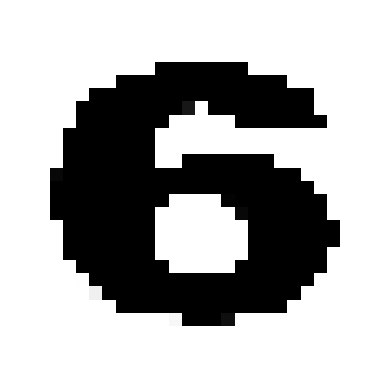

In [52]:
img = load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray')          # Отрисовка изображения
plt.axis('off')                       # Отключение ненужных осей
plt.show()

In [53]:
img_arr = img_to_array(img)
img_arr /= 255
img_arr = img_arr.reshape(1, 28, 28)
print(img_arr.shape)

(1, 28, 28)


In [54]:
prediction = model.predict(img_arr)
np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


np.int64(7)

### Не угадал

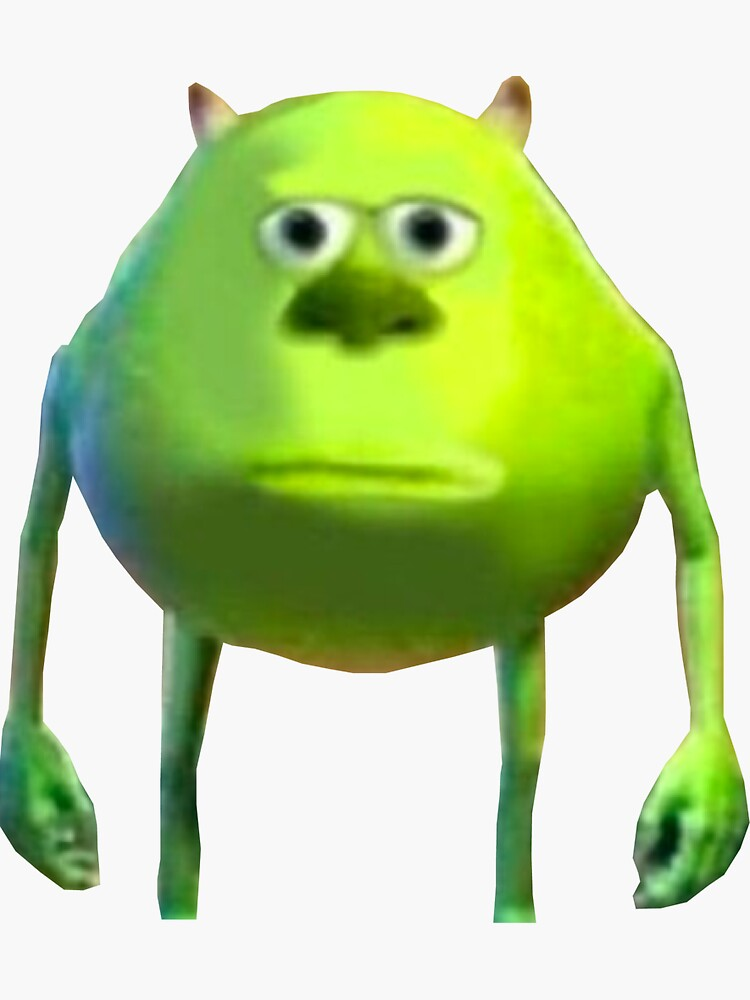